Let's load up our data and parse our dates. We also want to set aside the year as it will help us in our plots below.

In [1]:
import pandas as pd

GOOG = '/kaggle/input/google-stock-data-2024/GOOGL_2004-08-01_2024-12-18.csv'
df = pd.read_csv(filepath_or_buffer=GOOG, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,2004
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,2004
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,2004
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,2004
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,2004


Let's have a look at the price/volume correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999912,0.999903,0.999796,0.999795,-0.455516
High,0.999912,1.000000,0.999892,0.999905,0.999904,-0.454678
Low,0.999903,0.999892,1.000000,0.999917,0.999916,-0.456546
Close,0.999796,0.999905,0.999917,1.000000,0.999999,-0.455724
Adj Close,0.999795,0.999904,0.999916,0.999999,1.000000,-0.455606
Volume,-0.455516,-0.454678,-0.456546,-0.455724,-0.455606,1.000000


What to we see? We see that our daily prices are highly correlated, which is not a surprise, as daily changes are vanishingly small over twenty years at 250+ trading days per year. We also see that the closing prices and adjusted closing prices are not identical, suggesting that there have been dividends at some point. And finally, we see that prices and volume are substantially negatively correlated. We "typically" see a small negative correlation between price and volume, so it will be interesting to see what this correlation looks like. 

Let's have a look at the adjusted closing price time series.

<Axes: xlabel='Date', ylabel='Adj Close'>

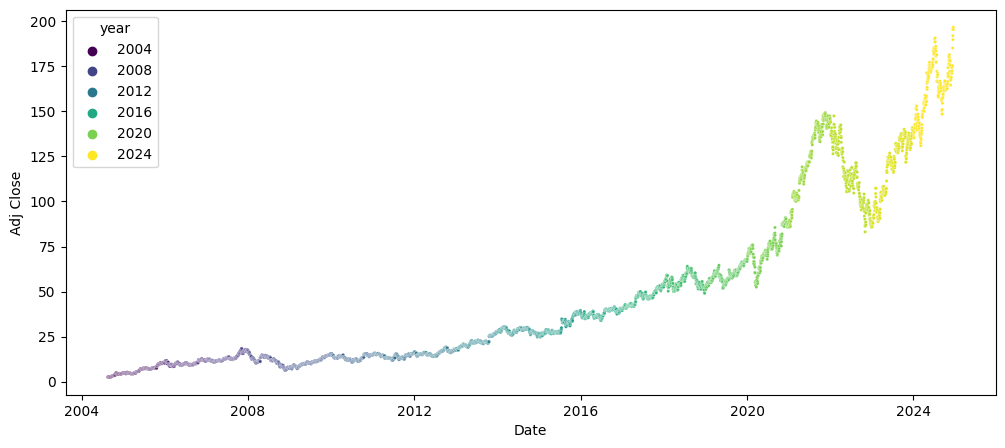

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Adj Close', palette='viridis', hue='year', s=5)

This looks for the most part like a very smooth upward curve except for some major retrenchment in the early 2020s. Let's see how all those little squiggles look if we plot the log of the price over time.

<Axes: xlabel='Date', ylabel='Adj Close'>

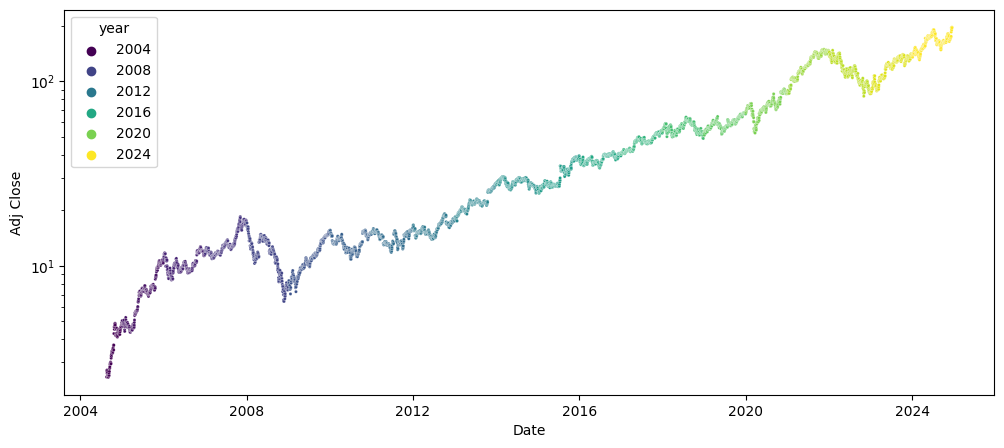

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Adj Close', palette='viridis', hue='year', s=5)

That 2020s reversal is still there and still big, but we also see one around 2010 that is interesting too. Other than that it seems like we mostly see a steady if noisy climb over time. What do we see if we do some averaging?

<Axes: xlabel='Date', ylabel='Adj Close'>

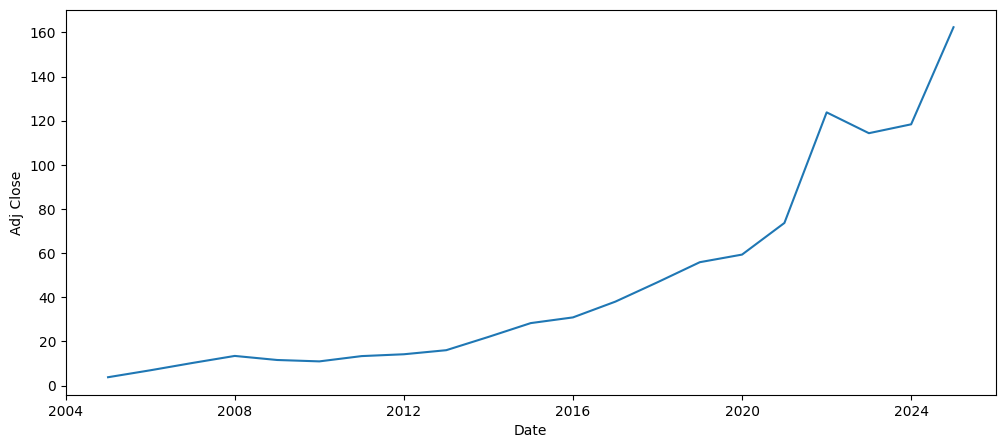

In [5]:
from warnings import filterwarnings
from seaborn import lineplot

filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
lineplot(data=df[['Date', 'Adj Close',]].set_index(keys=['Date']).resample('A').mean().reset_index(), x='Date', y='Adj Close', )

We have to use an annual average to get close to having our curve look really smooth, and even then not so much. 

As promised let's have a look at our daily price/volume relationship.

<Axes: xlabel='Adj Close', ylabel='Volume'>

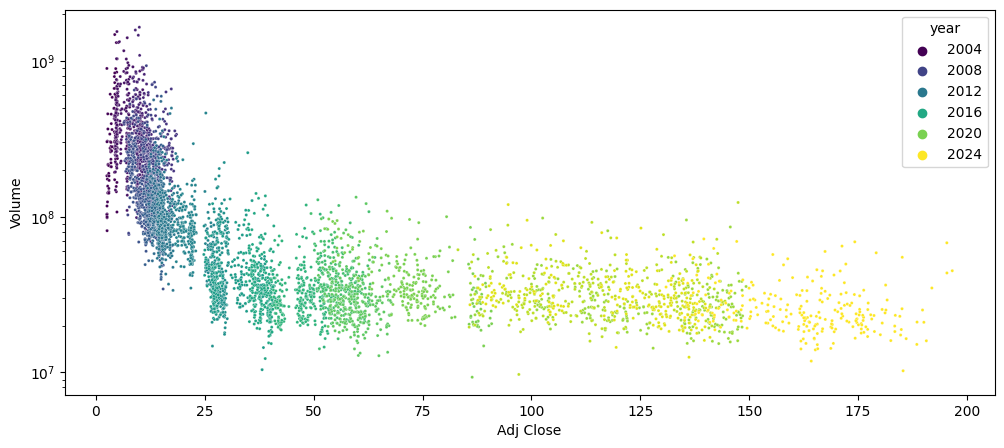

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Adj Close', y='Volume', palette='viridis', hue='year', s=5)

Here we need to plot the log of the volume against the price to see the general downward trend in volume over time. The volume numbers for the early years are crazy: 1e9 shares traded in a day is a lot. But since prices generally rose steadily our year cohorts give us a good sense of how prices rose over time, and how volume declined substantially at first, then more slowly.